In [2]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00


In [4]:
!pip install torch-tb-profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00


In [5]:
!pip install nvidia-ml-py3

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19173 sha256=f13371d95ff9200a13da07c9fbce3cc2537b07366fa6d9e6454838705861c12c
  Stored in directory: /root/.cache/pip/wheels/47/50/9e/29dc79037d74c3c1bb4a8661fb608e8674b7e4260d6a3f8f51
Successfully built nvidia-ml-py3


In [6]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available

True


In [7]:
import torch
import time
import torch.nn as nn
#dummy model
# Load a pretrained model (replace with your actual model file)
class SimpleLLM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLLM, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Example: Simple LLM model with 768 input, 1024 hidden, 768 output
model = SimpleLLM(768, 1024, 768)

# Generate dummy input data (batch of 1, input size 768)
inputs = torch.randn(1, 768)

# Run on CPU
model = model.to("cpu")
start_time = time.time()
output_cpu = model(inputs)
end_time = time.time()
print(f"CPU Inference Time: {end_time - start_time:.4f} seconds")

# Run on GPU (if available)
if torch.cuda.is_available():
    model = model.to("cuda")
    inputs = inputs.to("cuda")

    start_time = time.time()
    output_gpu = model(inputs)
    end_time = time.time()
    print(f"GPU Inference Time: {end_time - start_time:.4f} seconds")
else:
    print("No GPU detected.")

CPU Inference Time: 0.0467 seconds
GPU Inference Time: 0.1859 seconds


In [8]:
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

GPU Name: Tesla T4


In [9]:
import torch.profiler as profiler

with profiler.profile(
    activities=[
        profiler.ProfilerActivity.CPU,
        profiler.ProfilerActivity.CUDA],
    record_shapes=True,
    profile_memory=True) as prof:

    # Pass the tensor directly to the model's forward method
    output = model(inputs.to("cuda"))

print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::linear        20.39%       1.620ms        68.62%       5.451ms       2.725ms       0.000us         0.00%      36.416us      18.208us           0 b           0 b       7.00 Kb           0 

In [10]:
#profiling on dummy model
import torch
import time
import torch.nn as nn
import torch.profiler as profiler
import nvidia_smi

def run_and_profile(model, inputs, batch_size, device):
    model = model.to(device)
    inputs = inputs.to(device)

    torch.cuda.synchronize() #Ensure all operations are done
    start_time = time.time()
    with profiler.profile(
        activities=[
            profiler.ProfilerActivity.CPU,
            profiler.ProfilerActivity.CUDA],
        record_shapes=True,
        profile_memory=True
        ) as prof:
        output = model(inputs)

    torch.cuda.synchronize() #Ensure all operations are done
    end_time = time.time()

    latency = end_time - start_time

    # ... (FLOPs and Memory BW estimation - Replace with more accurate methods)
    # For now, use basic estimations as placeholders
    total_flops = 2 * inputs.numel() * model.fc1.out_features + 2 * model.fc1.out_features * model.fc2.out_features
    memory_bw = inputs.numel() * 4 / latency  # Approximate

    nvidia_smi.nvmlInit()
    handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
    info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
    gpu_memory_used = info.used
    nvidia_smi.nvmlShutdown()


    return prof, latency, total_flops, memory_bw, gpu_memory_used

# ... (Your existing code)

batch_sizes = [1, 8, 32, 128]
devices = ["cuda:0"] # Or add more devices if available  e.g., ["cuda:0", "cuda:1"]

for device_name in devices:
    device = torch.device(device_name)
    for batch_size in batch_sizes:
        # Generate input for given batch size.
        inputs = torch.randn(batch_size, 768)

        prof, latency, flops, memory_bw, gpu_mem_used  = run_and_profile(model, inputs, batch_size, device)

        print(f"Device: {device_name}, Batch Size: {batch_size}")
        print(f"Latency: {latency:.4f} seconds")
        print(f"Estimated FLOPs: {flops}")
        print(f"Estimated Memory BW: {memory_bw} bytes/sec") # Needs improvement
        print(f"GPU memory used: {gpu_mem_used} bytes")

        with open(f"profiling_results_{device_name}_batch_{batch_size}.txt", "w") as f:
            f.write(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))
#output will be given for dummy model

Device: cuda:0, Batch Size: 1
Latency: 0.0067 seconds
Estimated FLOPs: 3145728
Estimated Memory BW: 459977.9340282736 bytes/sec
GPU memory used: 448659456 bytes
Device: cuda:0, Batch Size: 8
Latency: 0.0396 seconds
Estimated FLOPs: 14155776
Estimated Memory BW: 620798.3179296929 bytes/sec
GPU memory used: 448659456 bytes
Device: cuda:0, Batch Size: 32
Latency: 0.0463 seconds
Estimated FLOPs: 51904512
Estimated Memory BW: 2122270.630766776 bytes/sec
GPU memory used: 448659456 bytes
Device: cuda:0, Batch Size: 128
Latency: 0.0055 seconds
Estimated FLOPs: 202899456
Estimated Memory BW: 71979550.54615285 bytes/sec
GPU memory used: 450756608 bytes


In [11]:
#taken 1 example input text and 1 decoder and 1 encoder-decoder model
import torch
import torch.profiler as profiler
from transformers import AutoModelForCausalLM, AutoModelForSeq2SeqLM, AutoTokenizer
import warnings
warnings.filterwarnings("ignore")

# Select models (Decoder-Only & Encoder-Decoder)
decoder_model_name = "facebook/opt-350m"  # Example decoder-only model
encoder_decoder_model_name = "t5-small"   # Example encoder-decoder model

# Load models and tokenizers
decoder_tokenizer = AutoTokenizer.from_pretrained(decoder_model_name)
decoder_model = AutoModelForCausalLM.from_pretrained(decoder_model_name)

encoder_decoder_tokenizer = AutoTokenizer.from_pretrained(encoder_decoder_model_name)
encoder_decoder_model = AutoModelForSeq2SeqLM.from_pretrained(encoder_decoder_model_name)

# Sample Input
input_text = "What is the capital of France?"
decoder_inputs = decoder_tokenizer(input_text, return_tensors="pt")
encoder_decoder_inputs = encoder_decoder_tokenizer(input_text, return_tensors="pt")

# Select Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Move models & inputs to device
decoder_model.to(device)
encoder_decoder_model.to(device)
decoder_inputs = {k: v.to(device) for k, v in decoder_inputs.items()}
encoder_decoder_inputs = {k: v.to(device) for k, v in encoder_decoder_inputs.items()}

# Function to Profile Inference
def profile_inference(model, inputs, model_name, is_encoder_decoder=False):
    with profiler.profile(
        activities=[profiler.ProfilerActivity.CPU, profiler.ProfilerActivity.CUDA],
        record_shapes=True,
        profile_memory=True
    ) as prof:
        with torch.no_grad():
            if is_encoder_decoder:
                decoder_input_ids = inputs["input_ids"]
                model(input_ids=inputs["input_ids"], decoder_input_ids=decoder_input_ids)
            else:
                model(**inputs)

    # Print profiling results
    print(f"\nProfiling Results for {model_name}:\n")
    print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

# Run Profiling
profile_inference(decoder_model, decoder_inputs, "Decoder-Only Model (OPT-350M)")
profile_inference(encoder_decoder_model, encoder_decoder_inputs, "Encoder-Decoder Model (T5-Small)", is_encoder_decoder=True)

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/663M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/662M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Using device: cuda

Profiling Results for Decoder-Only Model (OPT-350M):

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::linear         0.33%       1.243ms        13.17%      50.079ms     340.675us       0.000us         0.00%      15.

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.



Profiling Results for Encoder-Decoder Model (T5-Small):

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::matmul         1.28%       4.590ms         3.34%      12.004ms      90.255us       0.000us         0.00%       3.734ms      28.07

In [12]:
# Import necessary libraries for model loading and profiling
import torch
import torch.profiler as profiler
from transformers import (
    AutoModelForCausalLM, AutoModelForSeq2SeqLM, AutoTokenizer,
    BloomTokenizerFast, BloomForCausalLM
)

# Define model names (Decoder-Only and Encoder-Decoder)
decoder_model_name = "facebook/opt-350m"  # OPT-350M is a decoder-only model
encoder_decoder_model_name = "t5-small"   # T5-Small is an encoder-decoder model
bloom_model_name = "bigscience/bloom-560m"  # BLOOM-560M is another decoder-only model
bart_model_name = "facebook/bart-base"  # BART-Base is an encoder-decoder model

# Load tokenizers and models
decoder_tokenizer = AutoTokenizer.from_pretrained(decoder_model_name)
decoder_model = AutoModelForCausalLM.from_pretrained(decoder_model_name)

encoder_decoder_tokenizer = AutoTokenizer.from_pretrained(encoder_decoder_model_name)
encoder_decoder_model = AutoModelForSeq2SeqLM.from_pretrained(encoder_decoder_model_name)

bloom_tokenizer = BloomTokenizerFast.from_pretrained(bloom_model_name)
bloom_model = BloomForCausalLM.from_pretrained(bloom_model_name)

bart_tokenizer = AutoTokenizer.from_pretrained(bart_model_name)
bart_model = AutoModelForSeq2SeqLM.from_pretrained(bart_model_name)

# Select Device (Use GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Move models to the selected device
decoder_model.to(device)
encoder_decoder_model.to(device)
bloom_model.to(device)
bart_model.to(device)

# Function to profile inference performance
def profile_inference(model, tokenizer, model_name, batch_size, is_encoder_decoder=False):
    """
    Profiles the inference latency and memory bandwidth of a given model.

    Args:
        model: The transformer model to be tested.
        tokenizer: The tokenizer corresponding to the model.
        model_name: The name of the model for logging.
        batch_size: The input batch size.
        is_encoder_decoder: Whether the model follows an encoder-decoder architecture.
    """
    # Prepare inputs with the given batch size
    inputs = tokenizer(["What is the capital of France?"] * batch_size, return_tensors="pt", padding=True).to(device)

    # Synchronize CUDA to ensure correct latency measurements
    torch.cuda.synchronize()

    # Profile inference execution time and memory usage
    with profiler.profile(
        activities=[profiler.ProfilerActivity.CPU, profiler.ProfilerActivity.CUDA],
        record_shapes=True,
        profile_memory=True
    ) as prof:
        with torch.no_grad():
            if is_encoder_decoder:
                # For encoder-decoder models, provide both input and decoder input
                decoder_input_ids = inputs["input_ids"]
                model(input_ids=inputs["input_ids"], decoder_input_ids=decoder_input_ids)
            else:
                # For decoder-only models, use regular forward pass
                model(**inputs)

    # Ensure all CUDA operations have completed before measuring latency
    torch.cuda.synchronize()

    # Compute latency and estimated memory bandwidth
    latency = sum(evt.self_cpu_time_total for evt in prof.key_averages()) / 1e6  # Convert to seconds
    memory_bw = inputs["input_ids"].numel() * 4 / latency if latency > 0 else 0  # Approximate memory bandwidth

    # Print profiling results
    print(f"\nProfiling Results for {model_name} (Batch Size: {batch_size}):")
    print(f"Latency: {latency:.4f} seconds")
    print(f"Estimated Memory BW: {memory_bw:.2f} bytes/sec")
    print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

    # Save profiling results to a file for later analysis
    with open(f"profiling_results_{model_name}_batch_{batch_size}.txt", "w") as f:
        f.write(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

# Define batch sizes to evaluate
batch_sizes = [1, 8, 32, 128]

# Run profiling for all models across different batch sizes
for batch_size in batch_sizes:
    profile_inference(decoder_model, decoder_tokenizer, "OPT-350M", batch_size, is_encoder_decoder=False)
    profile_inference(bloom_model, bloom_tokenizer, "BLOOM-560M", batch_size, is_encoder_decoder=False)
    profile_inference(encoder_decoder_model, encoder_decoder_tokenizer, "T5-Small", batch_size, is_encoder_decoder=True)
    profile_inference(bart_model, bart_tokenizer, "BART-Base", batch_size, is_encoder_decoder=True)


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Using device: cuda

Profiling Results for OPT-350M (Batch Size: 1):
Latency: 0.0286 seconds
Estimated Memory BW: 1118.40 bytes/sec
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::linear         4.56%       1.305ms        45.98%      13

In [13]:
import torch
import torch.profiler as profiler
from transformers import AutoModelForCausalLM, AutoModelForSeq2SeqLM, AutoTokenizer

def load_model_and_tokenizer(model_name, is_encoder_decoder=False):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model_class = AutoModelForSeq2SeqLM if is_encoder_decoder else AutoModelForCausalLM
    model = model_class.from_pretrained(model_name)
    return model, tokenizer

# Define models for different workloads
decoder_models = {"OPT-350M": "facebook/opt-350m", "BLOOM-560M": "bigscience/bloom-560m"}
encoder_decoder_models = {"T5-Small": "t5-small", "BART-Base": "facebook/bart-base"}

# Load models and tokenizers
decoder_instances = {name: load_model_and_tokenizer(model) for name, model in decoder_models.items()}
encoder_decoder_instances = {name: load_model_and_tokenizer(model, is_encoder_decoder=True) for name, model in encoder_decoder_models.items()}

# Select Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

for name, (model, _) in {**decoder_instances, **encoder_decoder_instances}.items():
    model.to(device)

def profile_inference(model, tokenizer, model_name, batch_size, workload, is_encoder_decoder=False):
    # Define workload-specific input
    workload_inputs = {
        "summarization": "Artificial Intelligence is transforming the world. It has applications in healthcare, finance, and more.",
        "question_answering": "Context: The Eiffel Tower is in Paris, France. Question: Where is the Eiffel Tower?",
        "code_generation": "Write a Python function to check if a number is prime.",
        "translation": "Translate 'Hello, how are you?' to French."
    }
    text = workload_inputs.get(workload, "What is the capital of France?")
    inputs = tokenizer([text] * batch_size, return_tensors="pt", padding=True).to(device)

    torch.cuda.synchronize()
    with profiler.profile(
        activities=[profiler.ProfilerActivity.CPU, profiler.ProfilerActivity.CUDA],
        record_shapes=True,
        profile_memory=True
    ) as prof:
        with torch.no_grad():
            if is_encoder_decoder:
                decoder_input_ids = inputs["input_ids"]
                model(input_ids=inputs["input_ids"], decoder_input_ids=decoder_input_ids)
            else:
                model(**inputs)
    torch.cuda.synchronize()

    latency = sum(evt.self_cpu_time_total for evt in prof.key_averages()) / 1e6  # Convert to seconds
    memory_bw = inputs["input_ids"].numel() * 4 / latency if latency > 0 else 0  # Approximate memory bandwidth

    print(f"\nProfiling Results for {model_name} ({workload} - Batch Size: {batch_size}):")
    print(f"Latency: {latency:.4f} seconds")
    print(f"Estimated Memory BW: {memory_bw:.2f} bytes/sec")
    print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

    with open(f"profiling_results_{model_name}_{workload}_batch_{batch_size}.txt", "w") as f:
        f.write(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

# Batch sizes to test
batch_sizes = [1, 8, 32, 128]
workloads = ["summarization", "question_answering", "code_generation", "translation"]

# Run profiling for all models, workloads, and batch sizes
for workload in workloads:
    for batch_size in batch_sizes:
        for model_name, (model, tokenizer) in decoder_instances.items():
            profile_inference(model, tokenizer, model_name, batch_size, workload, is_encoder_decoder=False)
        for model_name, (model, tokenizer) in encoder_decoder_instances.items():
            profile_inference(model, tokenizer, model_name, batch_size, workload, is_encoder_decoder=True)


Using device: cuda

Profiling Results for OPT-350M (summarization - Batch Size: 1):
Latency: 0.0424 seconds
Estimated Memory BW: 1886.29 bytes/sec
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                           aten::linear         5.18%       2.198ms      

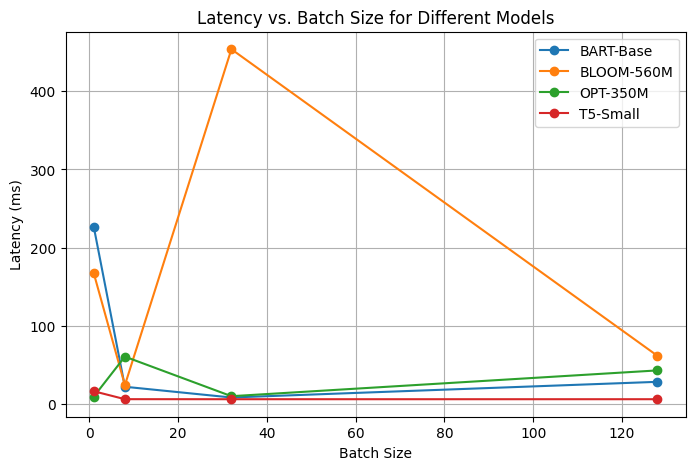

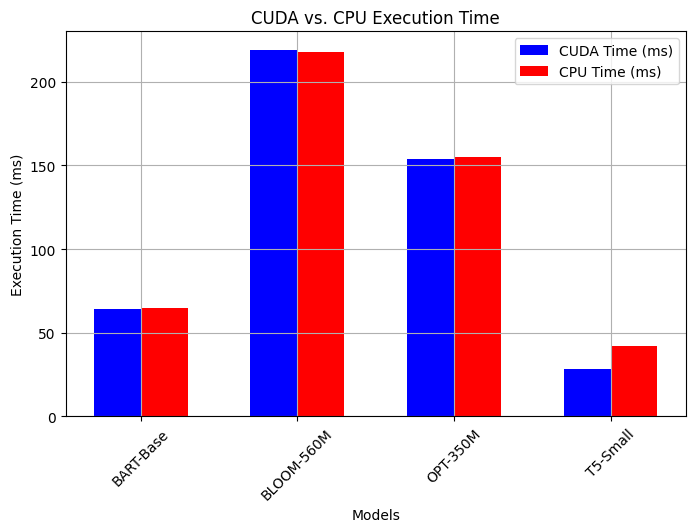

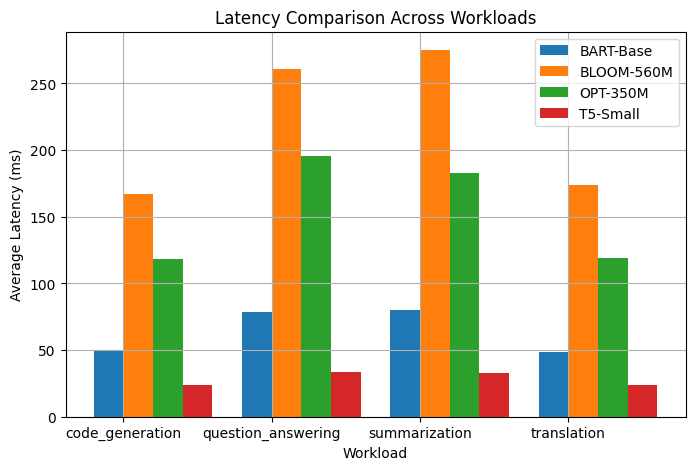

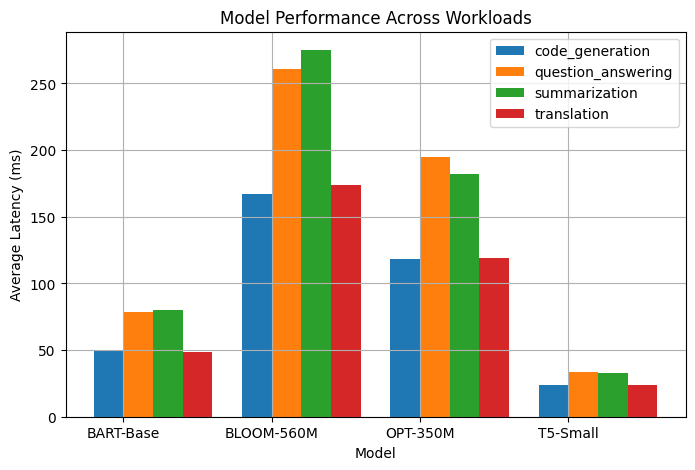

In [15]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

def parse_profiling_results():
    results = []
    for filename in os.listdir():
        if filename.startswith("profiling_results_") and filename.endswith(".txt"):
            match = re.match(r'profiling_results_(.*?)_(.*?)_batch_(\d+).txt', filename)
            if match:
                model, workload, batch_size = match.groups()
                batch_size = int(batch_size)

                with open(filename, "r") as f:
                    content = f.read()
                    latency_match = re.search(r"Self CUDA time total: ([\d.]+)ms", content)
                    cpu_time_match = re.search(r"Self CPU time total: ([\d.]+)ms", content)

                    if latency_match and cpu_time_match:
                        latency = float(latency_match.group(1))
                        cpu_time = float(cpu_time_match.group(1))
                        results.append((model, workload, batch_size, latency, cpu_time))

    return results

def plot_latency_vs_batch_size(results):
    models = sorted(set([r[0] for r in results]))
    batch_sizes = sorted(set([r[2] for r in results]))

    plt.figure(figsize=(8,5))
    for model in models:
        latencies = [r[3] for r in results if r[0] == model]
        plt.plot(batch_sizes, latencies[:len(batch_sizes)], marker='o', label=model)
    plt.xlabel("Batch Size")
    plt.ylabel("Latency (ms)")
    plt.title("Latency vs. Batch Size for Different Models")
    plt.legend()
    plt.grid()
    plt.show()

def plot_cpu_vs_cuda_time(results):
    plt.figure(figsize=(8, 5))
    models = sorted(set([r[0] for r in results]))
    width = 0.3
    x = np.arange(len(models))

    cuda_times = [np.mean([r[3] for r in results if r[0] == model]) for model in models]
    cpu_times = [np.mean([r[4] for r in results if r[0] == model]) for model in models]

    plt.bar(x - width/2, cuda_times, width, label='CUDA Time (ms)', color='blue')
    plt.bar(x + width/2, cpu_times, width, label='CPU Time (ms)', color='red')
    plt.xticks(x, models, rotation=45)
    plt.xlabel("Models")
    plt.ylabel("Execution Time (ms)")
    plt.title("CUDA vs. CPU Execution Time")
    plt.legend()
    plt.grid()
    plt.show()

def plot_latency_across_workloads(results):
    workloads = sorted(set([r[1] for r in results]))
    models = sorted(set([r[0] for r in results]))
    width = 0.2
    x = np.arange(len(workloads))

    plt.figure(figsize=(8, 5))
    for i, model in enumerate(models):
        latencies = [np.mean([r[3] for r in results if r[0] == model and r[1] == workload]) for workload in workloads]
        plt.bar(x + i * width, latencies, width, label=model)

    plt.xticks(x + width / 2, workloads)
    plt.xlabel("Workload")
    plt.ylabel("Average Latency (ms)")
    plt.title("Latency Comparison Across Workloads")
    plt.legend()
    plt.grid()
    plt.show()

def plot_model_performance_across_workloads(results):
    models = sorted(set([r[0] for r in results]))
    workloads = sorted(set([r[1] for r in results]))
    width = 0.2
    x = np.arange(len(models))

    plt.figure(figsize=(8, 5))
    for i, workload in enumerate(workloads):
        latencies = [np.mean([r[3] for r in results if r[0] == model and r[1] == workload]) for model in models]
        plt.bar(x + i * width, latencies, width, label=workload)

    plt.xticks(x + width / 2, models)
    plt.xlabel("Model")
    plt.ylabel("Average Latency (ms)")
    plt.title("Model Performance Across Workloads")
    plt.legend()
    plt.grid()
    plt.show()

# Parse results and plot
profiling_results = parse_profiling_results()
plot_latency_vs_batch_size(profiling_results)
plot_cpu_vs_cuda_time(profiling_results)
plot_latency_across_workloads(profiling_results)
plot_model_performance_across_workloads(profiling_results)
